**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   NOMBRE:
1. Andrea Xcaret Gomez Alfaro
2. Jose de Jesus N. Zuniga Gonzalez
3. Emiliano Palafox Ruiz
4. Miguel Ángel Bustamante Pérez
* MATRÍCULA:
1. A01796384
2. A00669728
3. A01796609
4. A01781583


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/Ciencia y analítica de datos"
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 8/Actividad8_RLineal"
os.chdir(DIR)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [9]:
numeric_columns = insurance_df.select_dtypes(include=np.number)
numeric_columns.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
cat_columns = insurance_df.select_dtypes(include='object')
cat_columns.describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


1b) Búsqueda de valores faltantes.

In [11]:
percentage = (insurance_df.isnull().sum() / len(insurance_df)) * 100
missing_data_df = pd.DataFrame({
    '% de valores faltantes': percentage
})

print("\nPorcentaje de valores faltantes por columna:\n")
missing_data_df.head(18)


Porcentaje de valores faltantes por columna:



,% de valores faltantes
age,0.0
sex,0.0
bmi,0.0
children,0.0
smoker,0.0
region,0.0
charges,0.0


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

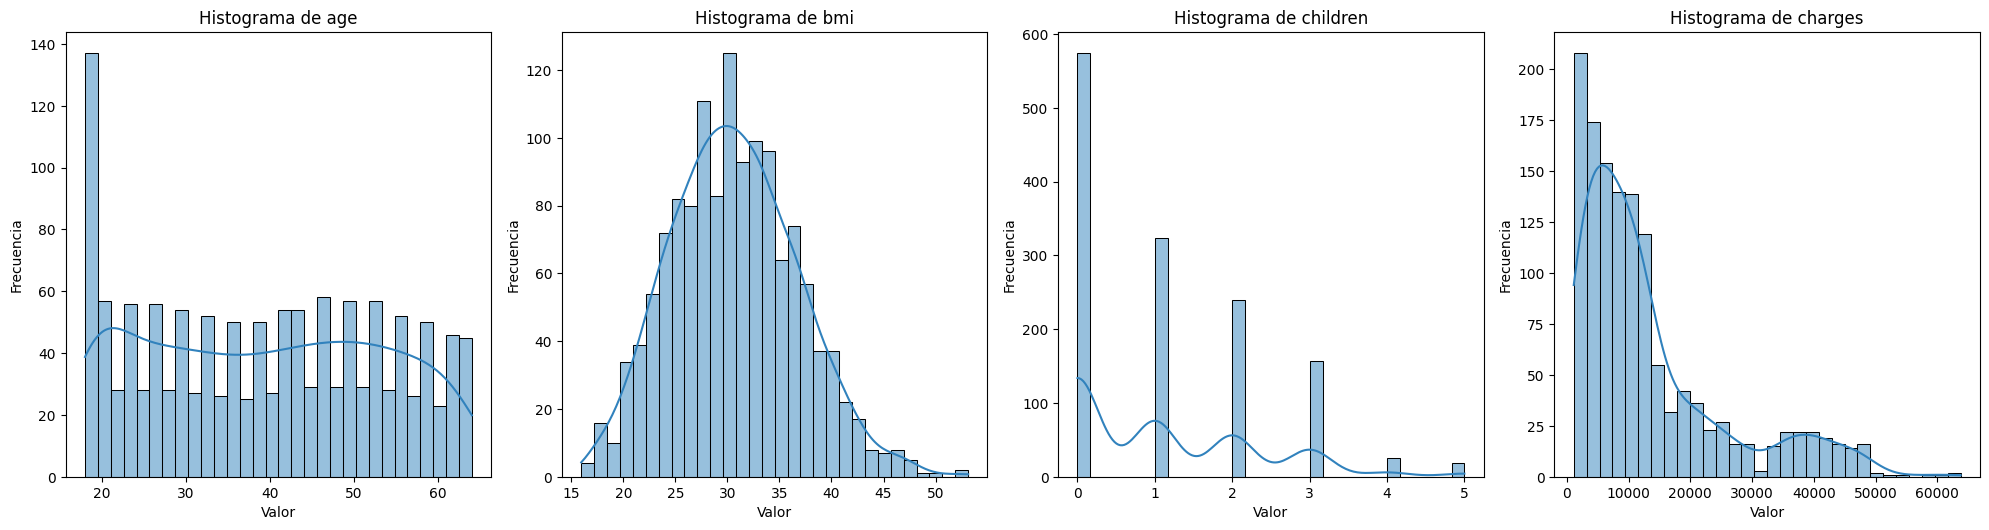

In [12]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(numeric_columns):
    plt.subplot(2, 4, i + 1)

    sns.histplot(insurance_df[column], kde=True, bins=30, color="#3182bd", alpha=0.5)

    plt.title(f"Histograma de {column}")
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

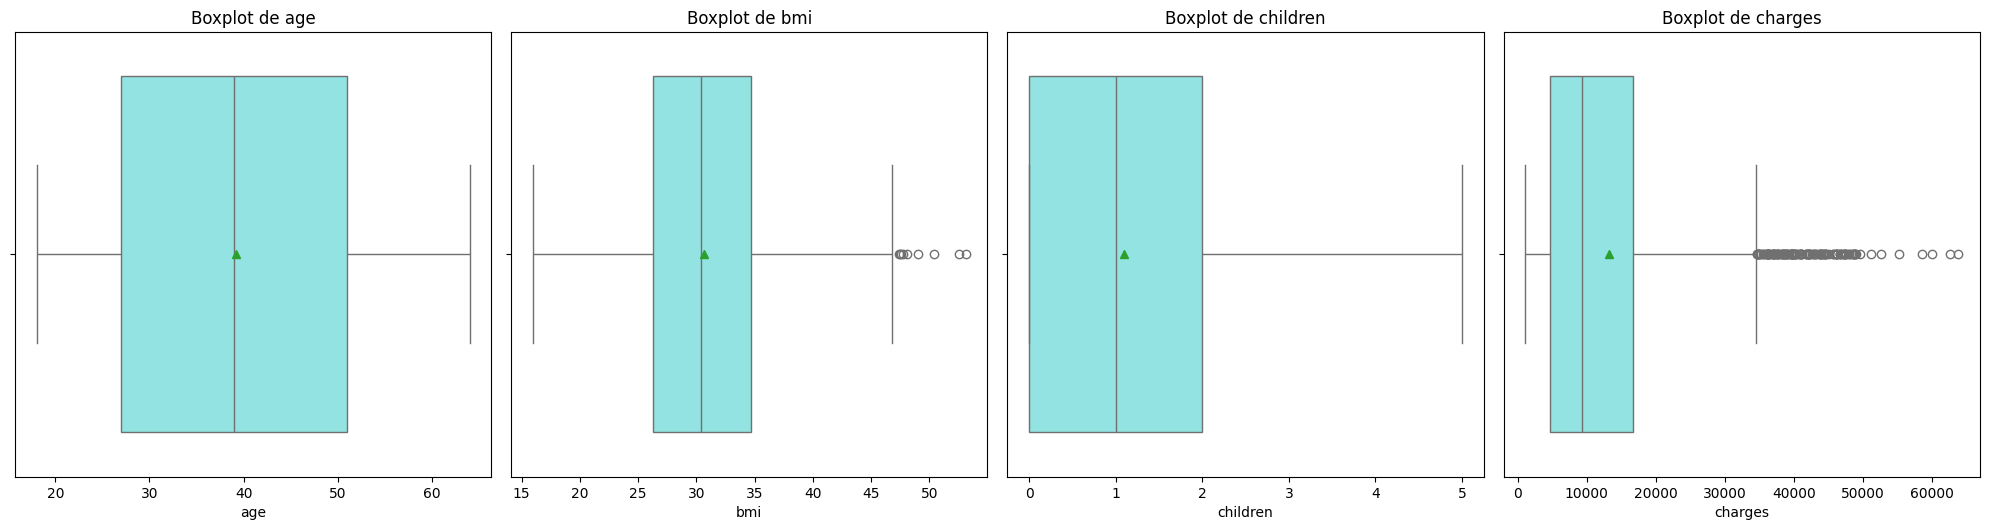

In [13]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(numeric_columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=insurance_df[column], showmeans=True, color="#84F1EE")
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

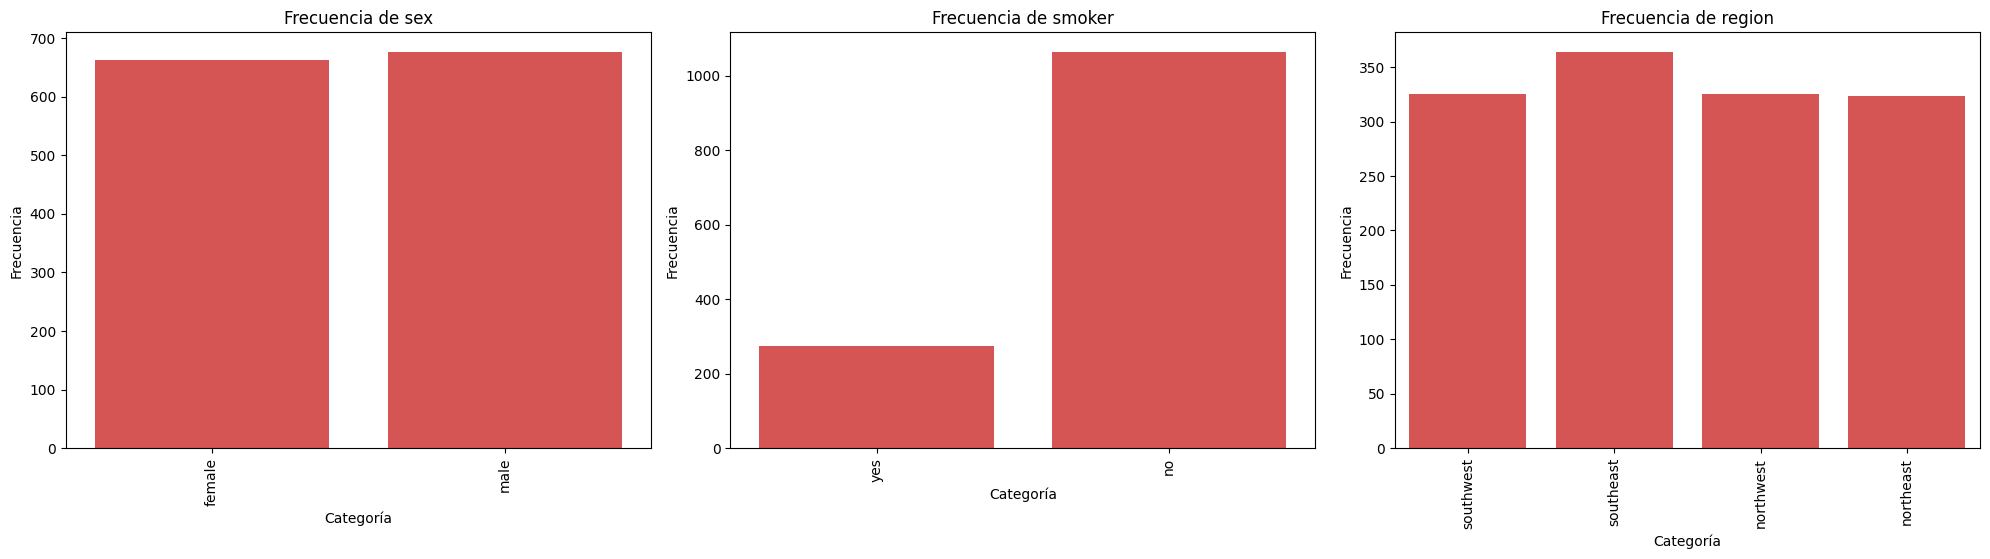

In [14]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(cat_columns):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=insurance_df[column], color="#E60E0E", alpha=0.8)
    plt.title(f"Frecuencia de {column}")
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

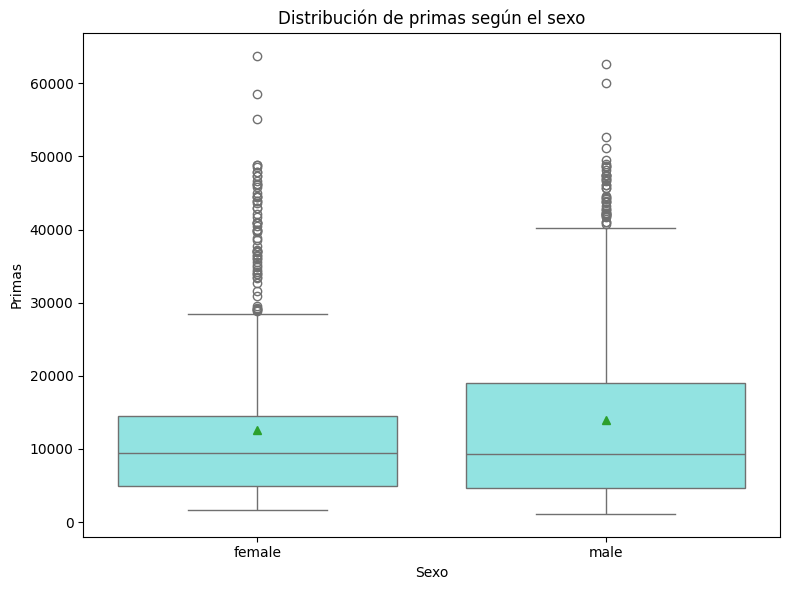

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=insurance_df['sex'], y=insurance_df['charges'], showmeans=True, color="#84F1EE")
plt.title("Distribución de primas según el sexo")
plt.xlabel("Sexo")
plt.ylabel("Primas")
plt.tight_layout()
plt.show()

La media es ligeramente superior en el caso de los hombres, la prima está más dispersa en el caso de los hombres y en el caso de las mujeres presentan más outliers.

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

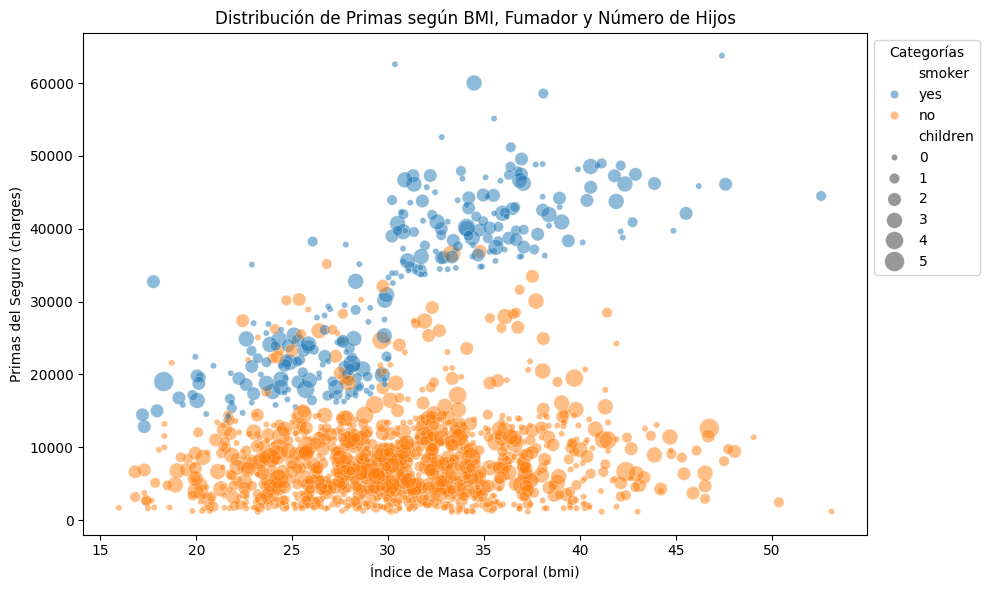

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="bmi",
    y="charges",
    data=insurance_df,
    hue="smoker",
    size="children",
    sizes=(20, 200),
    alpha=0.5
)

plt.title("Distribución de Primas según BMI, Fumador y Número de Hijos")
plt.xlabel("Índice de Masa Corporal (bmi)")
plt.ylabel("Primas del Seguro (charges)")
plt.legend(title="Categorías", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Las conclusiones del scatter plot son las siguientes:
1. **charges** y **bmi**: A medida que aumenta la masa corporal la prima en el seguro tiende a aumentar.
2. **smoker**: Sí la persona es smoker, la prima del seguro aumenta considerablemente en todos los bmi, en especial para bmi altos la prima se vuelve considerablemente alta.
3. **children**: La principal distinción de esta variable se ve cuando se tiene *0 hijos*, pues cuando no se tienen hijos y no son fumadores la prima del seguro es bastante baja. No así cuando son fumadores donde aunque no tengan hijos aumenta.

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

Text(0.5, 1.0, 'Correlation Heatmap')

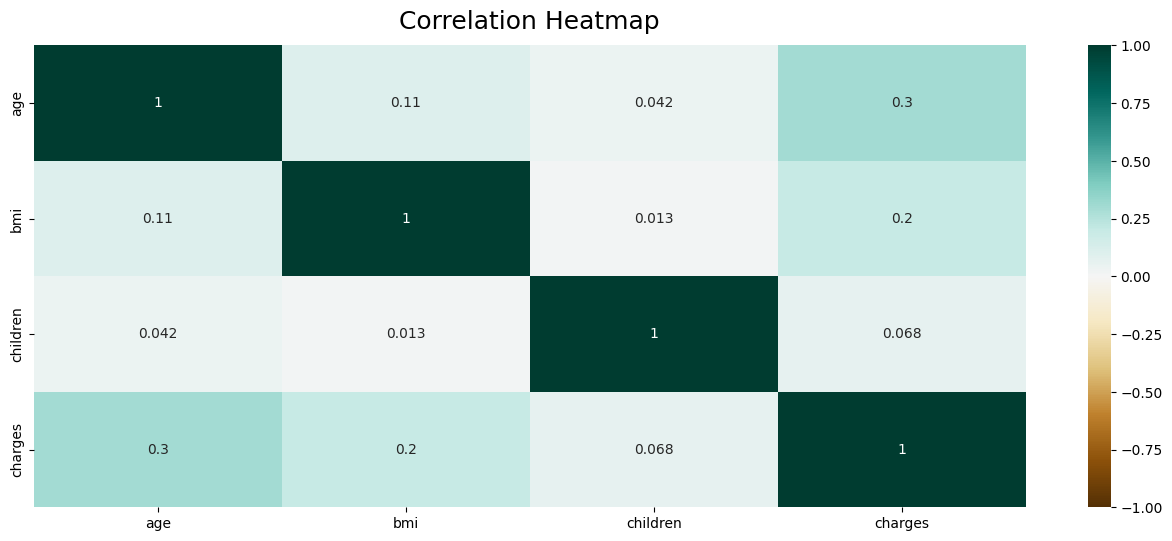

In [17]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(numeric_columns.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

Las variables presentan una correlación baja, a excepción de **age** y **bmi**, que a pesar de seguir siendo bajas tienen mayor correlación.

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi` en el dataframe de valores atípicos obtenido?

In [18]:
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el dataframe para obtener los valores atípicos
outliers_df = insurance_df[(insurance_df['charges'] < lower_bound) | (insurance_df['charges'] > upper_bound)]

# Calcular los promedios de 'age' y 'bmi' en el dataframe de valores atípicos
age_mean_outliers = outliers_df['age'].mean()
bmi_mean_outliers = outliers_df['bmi'].mean()

print("Promedio de 'age' en valores atípicos:", age_mean_outliers)
print("Promedio de 'bmi' en valores atípicos:", bmi_mean_outliers)

Promedio de 'age' en valores atípicos: 41.07913669064748
Promedio de 'bmi' en valores atípicos: 35.564604316546756


3b) ¿Qué porcentaje de estas observaciones (en el dataframe de valores atípicos obtenidos) se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

In [19]:
# Calcular el porcentaje de hombres y mujeres
gender_counts = outliers_df['sex'].value_counts(normalize=True) * 100
print("El porcentaje de mujeres y hombres con valores atípicos es:", gender_counts)

El porcentaje de mujeres y hombres con valores atípicos es: sex
male      64.028777
female    35.971223
Name: proportion, dtype: float64


In [20]:
# Calcular el porcentaje de fumadores y no fumadores
smoking_counts = outliers_df['smoker'].value_counts(normalize=True) * 100
print("El porcentaje de fumadores y no fumadores con valores atípicos es:", smoking_counts)

El porcentaje de fumadores y no fumadores con valores atípicos es: smoker
yes    97.841727
no      2.158273
Name: proportion, dtype: float64


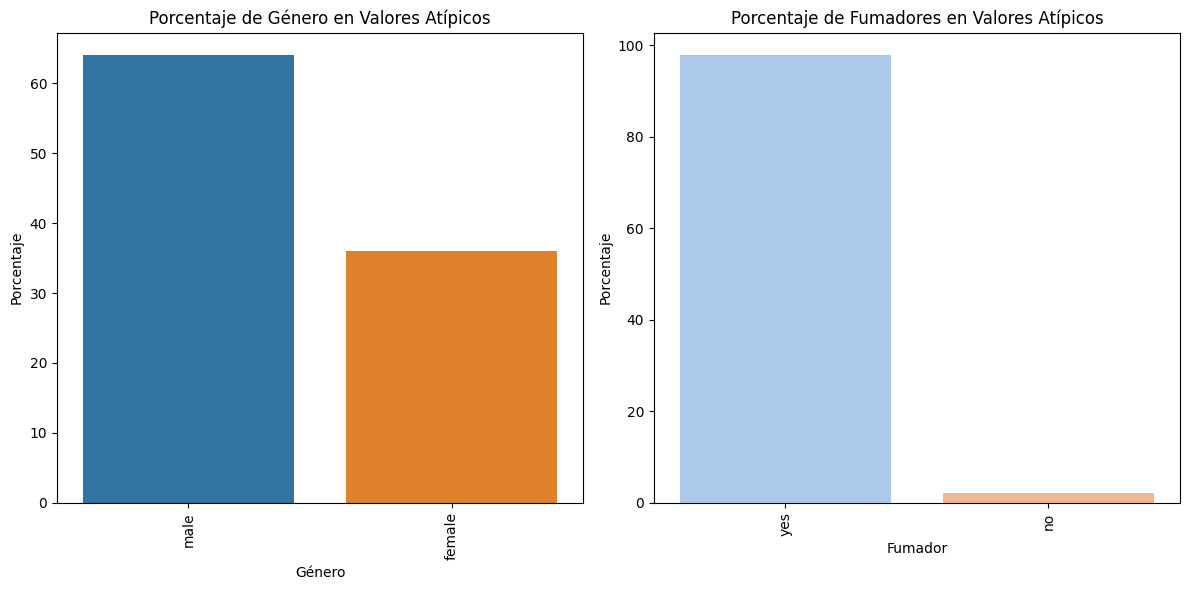

In [21]:
gender_smoking_df = pd.DataFrame({
    'Gender': gender_counts.index,
    'Gender_Percentage': gender_counts.values,
    'Smoker': smoking_counts.index,
    'Smoker_Percentage': smoking_counts.values
})

plt.figure(figsize=(12, 6))

# Gráfico de género
plt.subplot(1, 2, 1)
sns.barplot(data=gender_smoking_df, x='Gender', y='Gender_Percentage', hue='Gender')
plt.title('Porcentaje de Género en Valores Atípicos')
plt.ylabel('Porcentaje')
plt.xlabel('Género')
plt.xticks(rotation=90)

# Gráfico de fumadores
plt.subplot(1, 2, 2)
sns.barplot(data=gender_smoking_df, x='Smoker', y='Smoker_Percentage', hue='Smoker', palette='pastel')
plt.title('Porcentaje de Fumadores en Valores Atípicos')
plt.ylabel('Porcentaje')
plt.xlabel('Fumador')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [22]:
X = insurance_df.drop('charges', axis = 1)
y = insurance_df['charges']

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [23]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=1, stratify=X['smoker'])

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [24]:
# Librerías para preprocesamiento e ing de características
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Librerías para la canalización
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

# Librerías para la regresión
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))

preprocessing = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include=object))])

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

In [27]:
lr_model = make_pipeline(preprocessing, LinearRegression())
lr_model.fit(Xtrain, ytrain)
predictions = lr_model.predict(Xtest)

# Evaluar el modelo con RMSE y R2
print('El Error Cuadrático Medio (RMSE) es:', root_mean_squared_error(ytest, predictions))
print('El R² (R2) es:', r2_score(ytest, predictions))

El Error Cuadrático Medio (RMSE) es: 5698.759784532356
El R² (R2) es: 0.7538547215244324


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [28]:
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [29]:
ytrain_out = ytrain.clip(upper=upper_bound)
ytest_out = ytest.clip(upper=upper_bound)

In [30]:
lr_model2 = make_pipeline(preprocessing, LinearRegression())
lr_model2.fit(Xtrain, ytrain_out)
predictions = lr_model2.predict(Xtest)

print('El Error Cuadrático Medio (RMSE) es:',  root_mean_squared_error(ytest_out, predictions))
print('El R² (R2) es:', r2_score(ytest_out, predictions))

El Error Cuadrático Medio (RMSE) es: 4812.06172831982
El R² (R2) es: 0.7637776364359082


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [31]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [32]:
num_pipeline2 = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
cat_pipeline2 = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder())

preprocessing2 = ColumnTransformer([
    ('num', num_pipeline2, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline2, make_column_selector(dtype_include=object))
    ])

In [33]:
ytrain_out = ytrain.clip(upper=upper_bound)
ytest_out = ytest.clip(upper=upper_bound)

In [34]:
lr_model3 = make_pipeline(preprocessing2, LinearRegression())
lr_model3.fit(Xtrain, ytrain_out)

predictions = lr_model3.predict(Xtest)

print('El Error Cuadrático Medio (RMSE) es:',  root_mean_squared_error(ytest_out, predictions))
print('El R² (R2) es:', r2_score(ytest_out, predictions))

El Error Cuadrático Medio (RMSE) es: 4811.600670456455
El R² (R2) es: 0.7638229005936741


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
best_rmse = float('inf')
best_degree = 1

for degree in range(1, 11):  # Prueba con grados del 1 al 10
    # Crear pipeline para regresión polinomial con preprocessing2 y PolynomialFeatures
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    lr_model = make_pipeline(preprocessing2, polynomial_features, LinearRegression())
    lr_model.fit(Xtrain, ytrain_out)

    predictions = lr_model.predict(Xtest)
    rmse = root_mean_squared_error(ytest_out, predictions)
    r2 = r2_score(ytest_out, predictions)
    print(f'Degree {degree} - RMSE: {rmse:.4f}, R²: {r2:.4f}')

    if rmse < best_rmse:
        best_rmse = rmse
        best_degree = degree
        best_model = lr_model

# Entrenar el modelo con el mejor grado encontrado
lr_model4 = best_model  # Modelo con el mejor grado
print(f'\nMejor grado: {best_degree}')
print('----------------------------------------------------')
print(f'El Error Cuadrático Medio (RMSE) es: {best_rmse:.4f}')
print('----------------------------------------------------')
print(f'El R² (R2) es: {r2_score(ytest_out, lr_model4.predict(Xtest)):.4f}')

Degree 1 - RMSE: 4811.6007, R²: 0.7638
Degree 2 - RMSE: 4285.5703, R²: 0.8126
Degree 3 - RMSE: 4481.8930, R²: 0.7951
Degree 4 - RMSE: 4820.7807, R²: 0.7629
Degree 5 - RMSE: 7789.9154, R²: 0.3810
Degree 6 - RMSE: 63105.0112, R²: -39.6243
Degree 7 - RMSE: 339829.5570, R²: -1177.0967
Degree 8 - RMSE: 11539443.4316, R²: -1358401.1369
Degree 9 - RMSE: 51757078.2309, R²: -27327387.7250
Degree 10 - RMSE: 162577919599.6908, R²: -269638408328642.0000

Mejor grado: 2
----------------------------------------------------
El Error Cuadrático Medio (RMSE) es: 4285.5703
----------------------------------------------------
El R² (R2) es: 0.8126
